In [1]:
from sklearn.datasets import make_blobs 
from sklearn.cluster import KMeans 
from sklearn.model_selection import  train_test_split
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time


In [2]:
K = np.random.randint(1,15)

In [3]:
# generate synthetic two-dimensional data 
X, y = make_blobs(n_samples = 1000, centers=K, random_state=1) # build the clustering model 

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

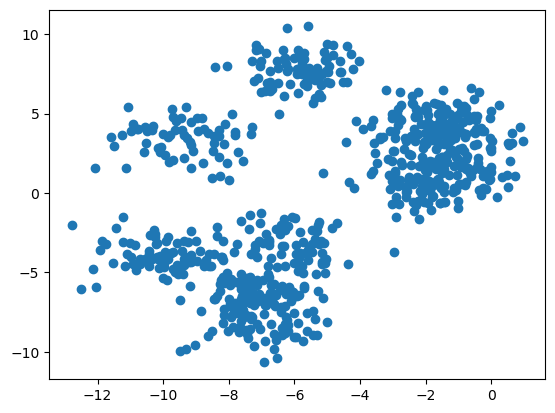

In [5]:
plt.scatter(X_train[:,0], X_train[:,1])
plt.show()

In [6]:
from sklearn.cluster import KMeans
elbow = [] 
for i in range(2, 15): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X) 
    elbow.append(kmeans.inertia_)

C:\Users\Bjorn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bjorn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Bjorn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bjorn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

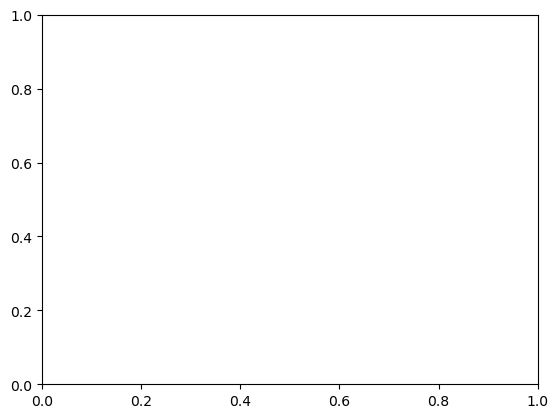

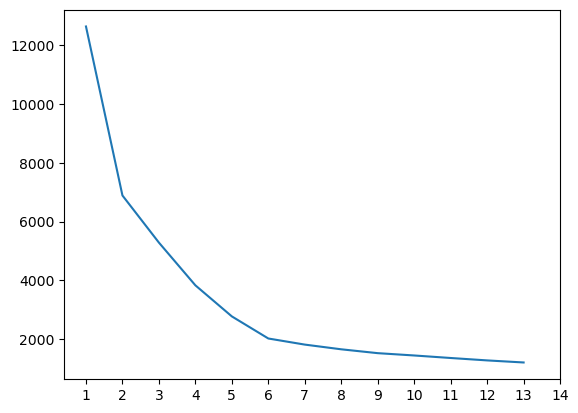

In [7]:
plt.gca()
plt.figure()
plt.plot(elbow)
plt.xticks(np.arange(0,14),np.arange(1,15))
plt.show()

In [8]:
my_k = input("K=")

K=6


In [9]:
kmeans = KMeans(n_clusters=int(my_k), init='k-means++')
kmeans.fit(X_train)

C:\Users\Bjorn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bjorn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans(n_clusters=6)

In [29]:
y_train_hat = kmeans.predict(X_train)

In [30]:
df_concat = pd.DataFrame(np.hstack([X_train,np.expand_dims(y_train_hat,axis=1)]), columns=["x","y","class"])

<IPython.core.display.Javascript object>


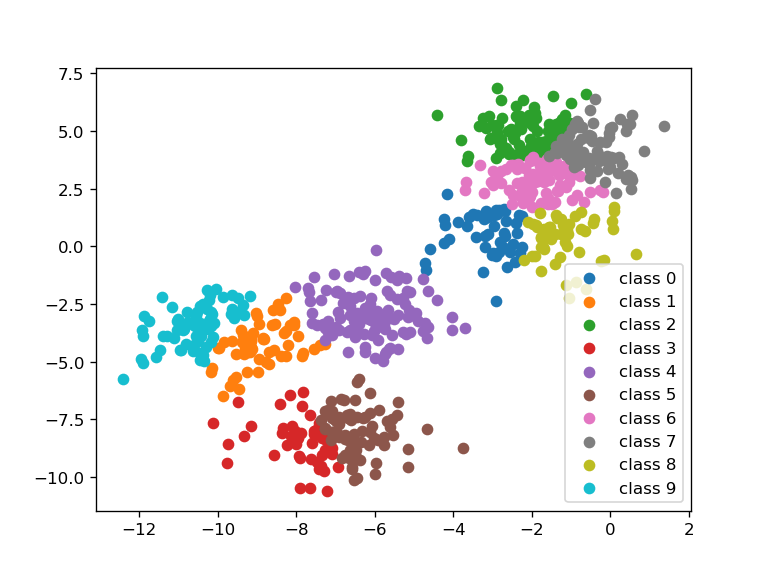

In [31]:
plt.figure()
for i in sorted(df_concat["class"].unique().astype(int)):
    plt.scatter(x=df_concat[df_concat["class"]==i].iloc[:,0], y=df_concat[df_concat["class"]==i].iloc[:,1], color="C{}".format(i), label="class {}".format(i))
plt.legend()

<IPython.core.display.Javascript object>


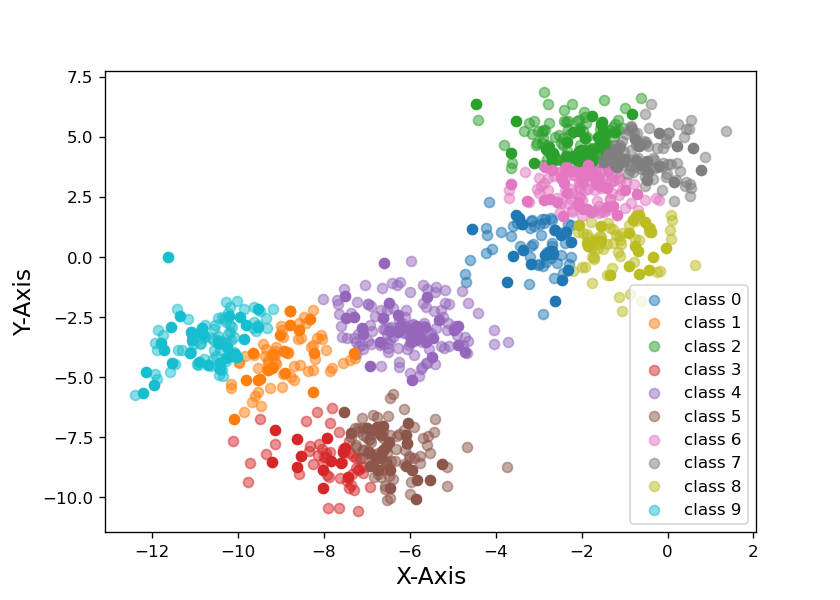

In [32]:
%matplotlib notebook

figure, ax = plt.subplots(figsize=(7,5))
plt.ion()


for i in sorted(df_concat["class"].unique().astype(int)):
    ax.scatter(x=df_concat[df_concat["class"]==i].iloc[:,0], y=df_concat[df_concat["class"]==i].iloc[:,1], color="C{}".format(i), label="class {}".format(i), alpha=0.5)


plt.xlabel("X-Axis",fontsize=14)
plt.ylabel("Y-Axis",fontsize=14)
plt.legend()

for j in X_test:

    plt.scatter(x=j[0],y=j[1], color="C{}".format(kmeans.predict(np.expand_dims(j,0))[0]))
    figure.canvas.draw()
    figure.canvas.flush_events()
    #time.sleep(0.1)
    